In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import cv2 as cv2
from sklearn.preprocessing import StandardScaler


In [ ]:
df = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = df.load_data()

print(test_labels)
print(train_images.shape)

4423680/4422102 [==============================] - 0s 0us/step
[9 2 1 ... 8 1 5]
(60000, 28, 28)


In [ ]:
# train_images = train_images / 255.0
# test_images = test_images / 255.0

train_images.shape
test_images.shape

trainX = train_images.reshape((60000, 28*28))
testX = test_images.reshape((10000, 28*28))

scaler = StandardScaler()

trainX = scaler.fit_transform(trainX)
testX = scaler.fit_transform(testX)

trainX = trainX.reshape((60000, 28, 28))
testX = testX.reshape((10000, 28, 28))


a = train_images.reshape(60000, 784)
a=np.dstack([a] * 3)
b = a.reshape(60000, 28, 28, 3)
c = test_images.reshape(10000, 784)
c = np.dstack([c] * 3)
d = c.reshape(10000, 28, 28, 3)

b = b/255.0
d = d/255.0

In [ ]:
print(b.shape)
print(d.shape)

print(trainX.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)
(60000, 28, 28)


In [ ]:
train = b.reshape([-1,28,28,3])
test = d.reshape([-1,28,28,3])

In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(input_shape=(28,28,3), filters=32, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.5),
                          keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
                          keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="valid", activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(3,3)),
                          keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="valid", activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.5),
                          keras.layers.Flatten(),
                          keras.layers.Dense(256),
                          keras.layers.LeakyReLU(),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(256),
                          keras.layers.LeakyReLU(),
                          keras.layers.Dense(256),
                          keras.layers.LeakyReLU(),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       5

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train, train_labels, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.7434 - accuracy: 0.7266 - val_loss: 0.4093 - val_accuracy: 0.8445
Epoch 2/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4345 - accuracy: 0.8461 - val_loss: 0.3619 - val_accuracy: 0.8680
Epoch 3/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3755 - accuracy: 0.8679 - val_loss: 0.3045 - val_accuracy: 0.8895
Epoch 4/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3373 - accuracy: 0.8822 - val_loss: 0.2959 - val_accuracy: 0.8894
Epoch 5/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3221 - accuracy: 0.8881 - val_loss: 0.2749 - val_accuracy: 0.9034
Epoch 6/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3093 - accuracy: 0.8922 - val_loss: 0.2688 - val_accuracy: 0.9020
Epoch 7/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2981 - accuracy: 0.8957 - val_loss: 0.2592 -

In [ ]:
# Metrics

test_loss, test_acc = model.evaluate(test, test_labels)

print("VGG - Training Loss: ", history.history['loss'][-1]*100)
print("VGG - Training Accuracy: ", history.history['acc'][-1]*100)
print("\n")

print("VGG - Validation Loss: ", history.history['val_loss'][-1]*100)
print("VGG - Validation Accuracy: ", history.history['val_acc'][-1]*100)
print("\n")

print("VGG - Test Loss: ", test_loss*100)
print("VGG - Test Accuracy: ", test_acc*100)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

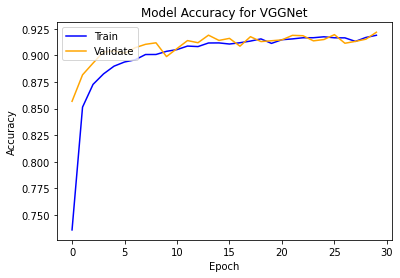

In [ ]:
# Plotting Model Accuracy

plt.plot(history.history['acc'], 'blue')
plt.plot(history.history['val_acc'], 'orange')
plt.title("Model Accuracy for VGGNet")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

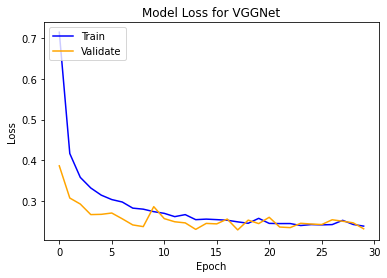

In [ ]:
# Plotting Model Loss

plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'orange')
plt.title("Model Loss for VGGNet")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')

In [ ]:
pred = model.predict_classes(test)
con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=pred).numpy()

In [ ]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index=class_names, columns=class_names)

In [ ]:
import seaborn as sns

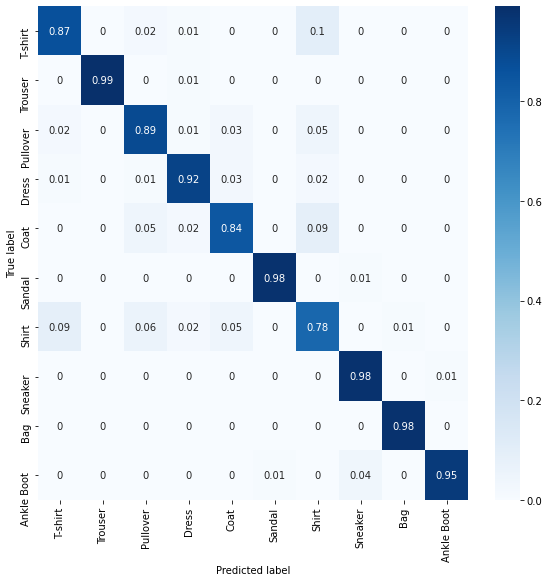

In [ ]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import sklearn.metrics as skm
print("\t\t\t\tMETRICS")
print(skm.classification_report(test_labels, pred, digits=3))

				METRICS
              precision    recall  f1-score   support

           0      0.878     0.868     0.873      1000
           1      0.993     0.988     0.990      1000
           2      0.870     0.891     0.880      1000
           3      0.931     0.920     0.926      1000
           4      0.878     0.838     0.858      1000
           5      0.985     0.982     0.983      1000
           6      0.744     0.776     0.760      1000
           7      0.940     0.985     0.962      1000
           8      0.983     0.982     0.982      1000
           9      0.984     0.948     0.966      1000

    accuracy                          0.918     10000
   macro avg      0.919     0.918     0.918     10000
weighted avg      0.919     0.918     0.918     10000

